In [1]:
import networkx as nx
import nxsim as nxs
import random as rand
import matplotlib.pyplot as plt

In [2]:
nodes = 10
G = nx.complete_graph(nodes)

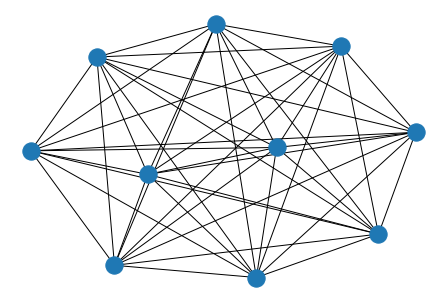

In [4]:
nx.draw(G)
plt.show()

In [5]:
class Outbreak(nxs.BaseNetworkAgent):
    def __init__(self, environment = None, agent_id = 0, state = ()):
        super().__init__(environment = environment, agent_id = agent_id, state = state)
        self.infect_prob = 0.05
        
    def run(self):
        while True:
            if self.state['id'] == 1:
                self.infected()
                yield self.env.timeout(1)
            else:
                yield self.env.event()
                
    def infected(self):
        normal_neighbors = self.get_neighboring_agents(state_id = 0)
        for neighbor in normal_neighbors:
            if rand.random() < self.infect_prob:
                neighbor.state['id'] = 1
                print(f'time: {self.env.now} | node_id: {self.id} | infected_node: {neighbor.id}')
                break

In [6]:
init_states = [{'id': 0, } for _ in range(nodes)]
init_states[5] = {'id': 1}
sim = nxs.NetworkSimulation(topology=G, states=init_states, agent_type=Outbreak,
                            max_time=30, dir_path='sim_01', num_trials=1, logging_interval=1.0)
sim.run_simulation()

Starting simulations...
---Trial 0---
Setting up agents...
time: 1 | node_id: 5 | infected_node: 3
time: 7 | node_id: 5 | infected_node: 0
time: 11 | node_id: 5 | infected_node: 2
time: 12 | node_id: 5 | infected_node: 1
time: 15 | node_id: 5 | infected_node: 6
time: 17 | node_id: 5 | infected_node: 4
time: 18 | node_id: 5 | infected_node: 8
time: 27 | node_id: 5 | infected_node: 7
Written 30 items to pickled binary file: sim_01\log.0.state.pickled
Simulation completed.


In [7]:
trial = nxs.BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)

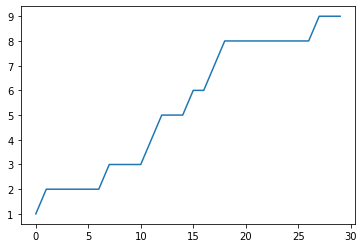

In [8]:
census = [sum([1 for node_id, state in g.items() if state['id'] == 1]) for t,g in trial.items()]
plt.plot(census)